### Importing Modules

- Before we begin any code, we have to import all the neccessary moudules
- These modules are used throughout for data manipulation, visualisation, model building and evaluation.
- Pandas is a data manipulation data library that provides tools for reading and manipulating data in various formats
- Numpy provides numerical and scientific computing functionality
- Mathplotlib and seaborn are visualization libraries
- Sklearn contains various machine learning algorithms and tools ofr model building 
- Scipy provides scientific computing and statiscal tools

In [74]:
#Importing reuqired modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import math
pd.pandas.set_option('display.max_columns',None)
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

### Reading Datafile

- Next, we ne need to read our csv file to retrieve data
- The data will be stored into a pandas Dataframe object called dataset_v1

In [75]:
dataset_v1=pd.read_csv('CVD_dataset.csv')

- The code below will return a tuple of 2 values
- The first value represents the number of rows
- The second value represents the number of columns in the dataset

In [76]:
print(dataset_v1.shape)

(70000, 1)


- Printing out the data in table form
- The first 5 values of the dataset will be shown

In [77]:
dataset_v1.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


### Cleaning the dataset

- As you can see, currently the dataset is very messy as variables such as "ID" , "Age" and "Height" are all linked together as one variable. 

- As such, we will need to separate all the variables and its respective data into its individual columns.

- The sep=';' parameter is used to specify the semicolon as the delimiter. The resulting dataframe will have the data split into individual columns based on the semicolon delimiter

- After that, we will print out the first 20 values of the new seperated dataset

In [78]:
dataset_v2 = pd.read_csv('CVD_dataset.csv', sep=';')
dataset_v2.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


- In Python pandas, df.info() is a method that provides a concise summary of a DataFrame. 
- When you call this method on a DataFrame object (df, in this case), it will print information about the DataFrame, such as:
    1) The number of rows (entries) and columns (features) in the DataFrame.
    2) The column names and their respective data types. In this case, there are 70000 rows and 13 different columns

In [79]:
dataset_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


- The isnull() method is used to detect any missing values in each column. 
- The sum() method is used to add up the number of missing values in each column, which produces the number of missing values for each column.
- The code then iterates over the columns in the DataFrame using the iteritems() method, and for each column, checks if there are any missing values. 
- If there are missing values, the code sets the found_missing_values flag to True, and uses the loc method to find the row numbers where the missing values occur. 
- Finally, if there are no missing values in the dataset, the code prints a message indicating that no missing values were found.

In [80]:
# Check for missing values in each column
missing_values = dataset_v2.isnull().sum()
found_missing_values = False

# Iterate over the columns and print the missing values
for col, num_missing in missing_values.iteritems():
    if num_missing > 0:
        found_missing_values = True
        missing_rows = dataset_v2[dataset_v2[col].isnull()]
        print(f"Missing values in column {col}:")
        print(missing_rows)

if not found_missing_values:
    print("There are no missing values found in the dataset.")

There are no missing values found in the dataset.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3240\3279776424.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, num_missing in missing_values.iteritems():


### Checking Outliers

- Generating descriptive statistics of a Pandas Dataframe

In [81]:
dataset_v2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


- Based on the information above, we can create subplots using the matplotlib.pylot
- Then, using the boxplot function from seaborn, we can create boxplots for the folowing variables:
    1. age
    2. height
    3. weight
    4. ap_hi (Systolic blood pressure)
    5. ap_lo (Diastolic blood pressure)
- This allows us to visualise the points as well as to see the outliers


[Text(0.5, 0, 'ap_lo')]

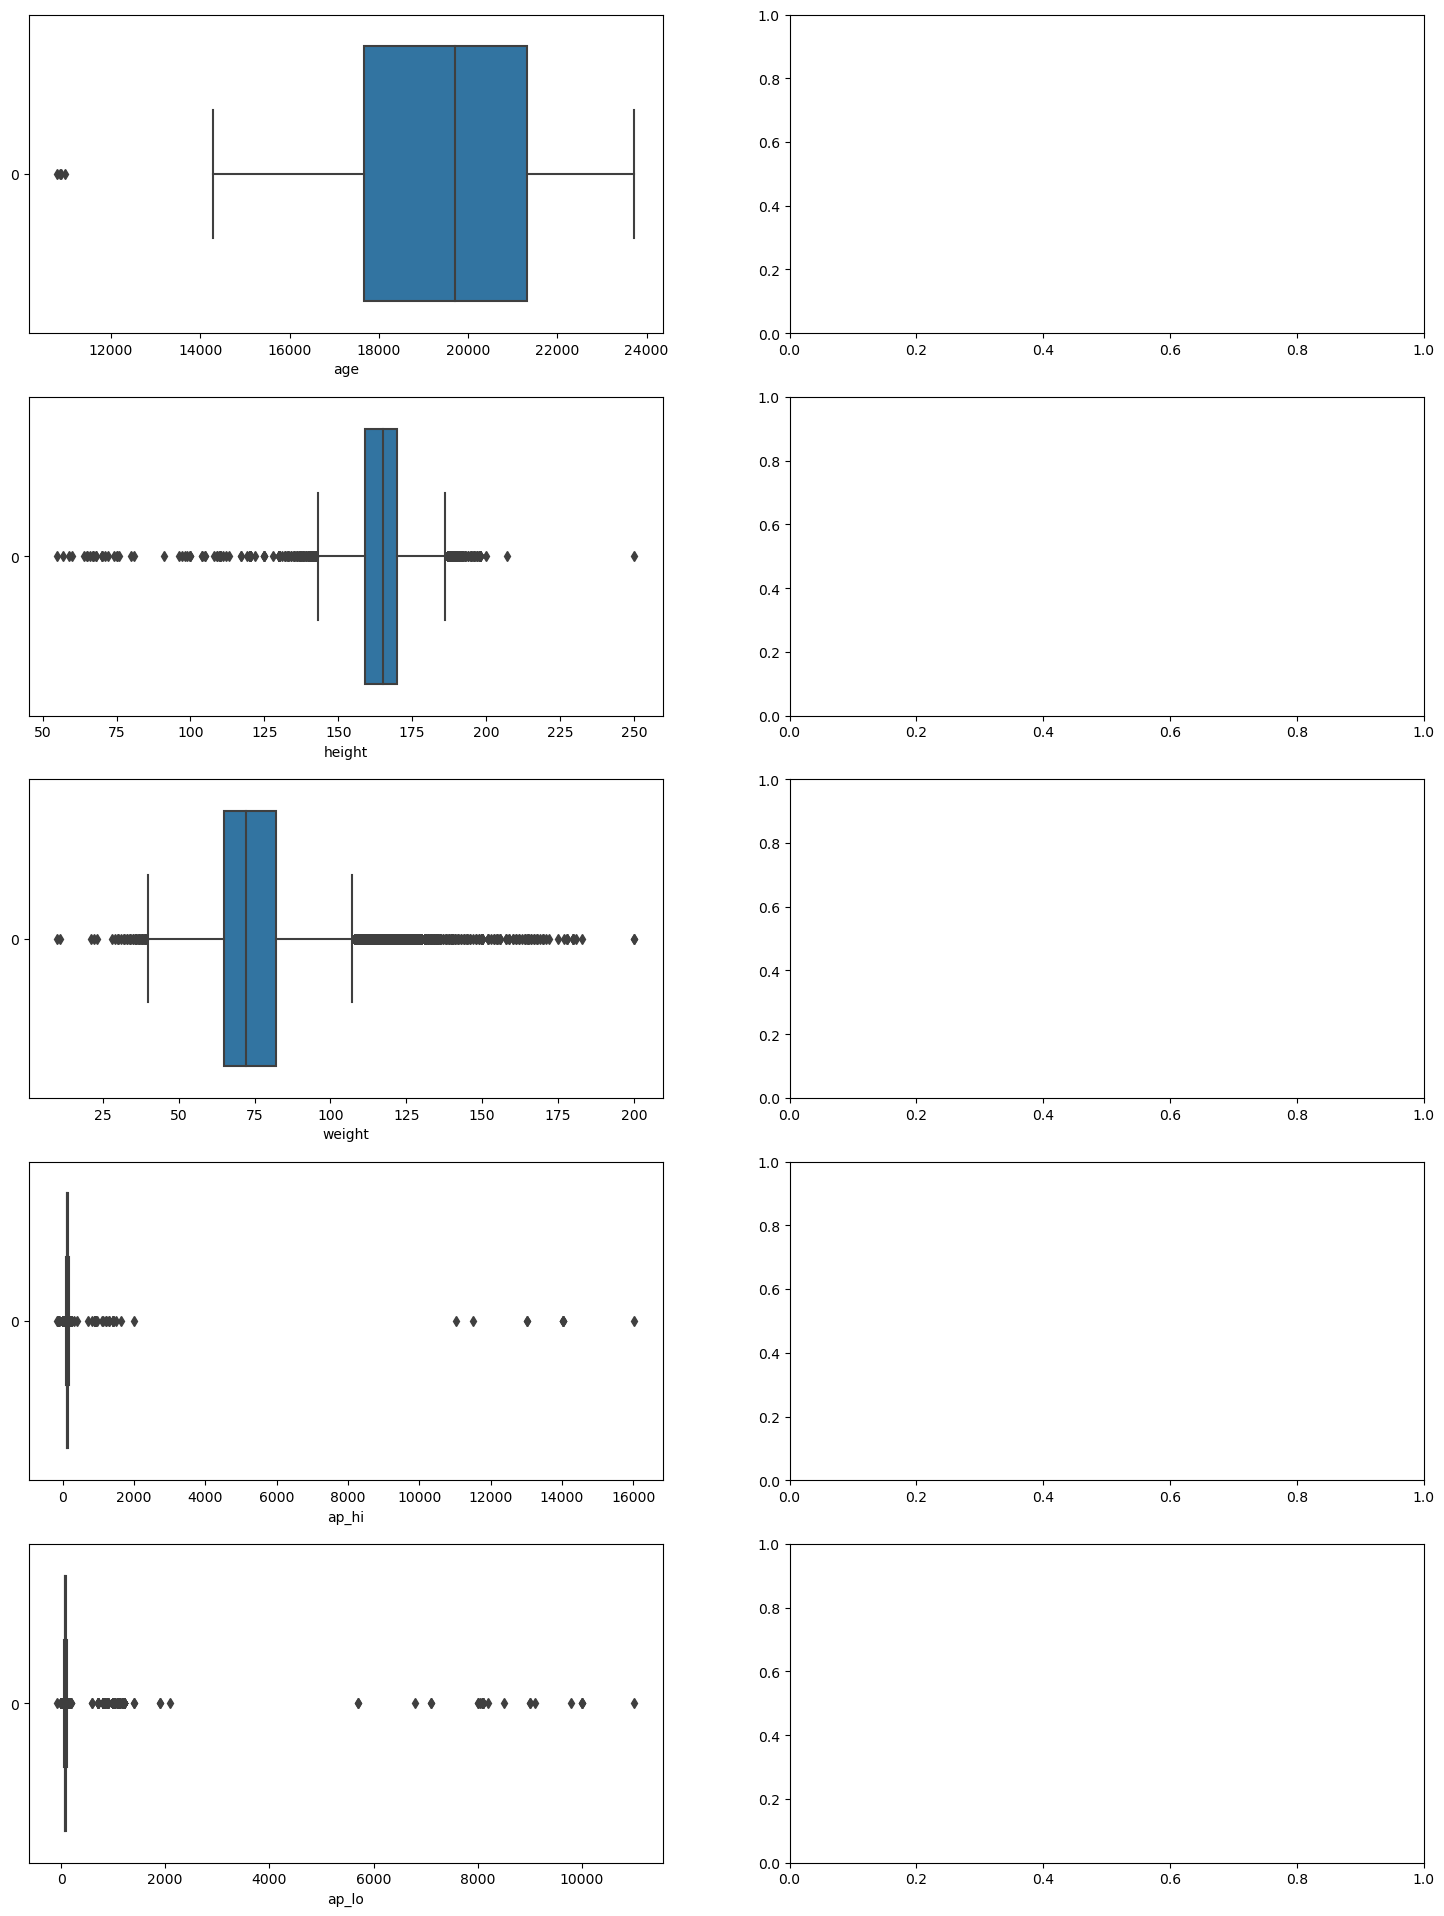

In [82]:
f, axes = plt.subplots(5, 2, figsize=(18, 24))

sb.boxplot(data = dataset_v2['age'], orient = "h", ax = axes[0,0]).set(xlabel="age")
sb.boxplot(data = dataset_v2['height'], orient = "h", ax = axes[1,0]).set(xlabel="height")
sb.boxplot(data = dataset_v2['weight'], orient = "h", ax = axes[2,0]).set(xlabel="weight")
sb.boxplot(data = dataset_v2['ap_hi'], orient = "h", ax = axes[3,0]).set(xlabel="ap_hi")
sb.boxplot(data = dataset_v2['ap_lo'], orient = "h", ax = axes[4,0]).set(xlabel="ap_lo")

### Removing Outliers 

- The following lines of code below performs outlier removal for the variables listed above
- We will calculate the Interquartile Range (IQR) of the age column and define a threshold of 1.5 times the IQR.
- Following that, we will idenify the datapoints that are outside the upper and lower bounds defined by the threshold and removes them from the their respective columns
- Finally, we will remove the same rows from the cardio, height, weight, ap_hi and ap_lo of the dataset and store the clean data in another new variable


In [83]:
data=dataset_v2['age']

# Calculate the IQR
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

# Define a threshold for the IQR
threshold = 1.5

# Calculate the upper and lower bounds for the data
lower_bound = q1 - (iqr * threshold)
upper_bound = q3 + (iqr * threshold)

# Indicate which data points are outside the bounds
outliers1 = (data < lower_bound) | (data > upper_bound)

# Remove the outliers from the data
cleaned_data = data[~outliers1]

cleaned_age = cleaned_data

# Remove the same rows from the cardio,age,height,weight
cardio_remove = dataset_v2['cardio'][~outliers1]
age_remove = dataset_v2['age'][~outliers1]
height_remove = dataset_v2['height'][~outliers1]
weight_remove = dataset_v2['weight'][~outliers1]
ap_hi_remove = dataset_v2['ap_hi'][~outliers1]
ap_lo_remove = dataset_v2['ap_lo'][~outliers1]

In [84]:
data=dataset_v2['height']

# Calculate the IQR
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

# Define a threshold for the IQR
threshold = 1.5

# Calculate the upper and lower bounds for the data
lower_bound = q1 - (iqr * threshold)
upper_bound = q3 + (iqr * threshold)

# Indicate which data points are outside the bounds
outliers2 = (data < lower_bound) | (data > upper_bound)

# Remove the outliers from the data
cleaned_data = data[~outliers2]

cleaned_height = cleaned_data

# Remove the same rows from the cardio,age,height,weight
cardio_remove = cardio_remove[~outliers2]
age_remove = age_remove[~outliers2]
height_remove = height_remove[~outliers2]
weight_remove = weight_remove[~outliers2]
ap_hi_remove = ap_hi_remove[~outliers2]
ap_lo_remove = ap_lo_remove[~outliers2]

In [85]:
data=dataset_v2['weight']

# Calculate the IQR
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

# Define a threshold for the IQR
threshold = 1.5

# Calculate the upper and lower bounds for the data
lower_bound = q1 - (iqr * threshold)
upper_bound = q3 + (iqr * threshold)

# Indicate which data points are outside the bounds
outliers3 = (data < lower_bound) | (data > upper_bound)

# Remove the outliers from the data
cleaned_data = data[~outliers3]

cleaned_weight = cleaned_data

# Remove the same rows from the cardio,age,height,weight
cardio_remove = cardio_remove[~outliers3]
age_remove = age_remove[~outliers3]
height_remove = height_remove[~outliers3]
weight_remove = weight_remove[~outliers3]
ap_hi_remove = ap_hi_remove[~outliers3]
ap_lo_remove = ap_lo_remove[~outliers3]

In [86]:
data=dataset_v2['ap_hi']

# Calculate the IQR
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

# Define a threshold for the IQR
threshold = 1.5

# Calculate the upper and lower bounds for the data
lower_bound = q1 - (iqr * threshold)
upper_bound = q3 + (iqr * threshold)

# Indicate which data points are outside the bounds
outliers4 = (data < lower_bound) | (data > upper_bound)

# Remove the outliers from the data
cleaned_data = data[~outliers4]

cleaned_ap_hi = cleaned_data

# Remove the same rows from the cardio,age,height,weight
cardio_remove = cardio_remove[~outliers4]
age_remove = age_remove[~outliers4]
height_remove = height_remove[~outliers4]
weight_remove = weight_remove[~outliers4]
ap_hi_remove = ap_hi_remove[~outliers4]
ap_lo_remove = ap_lo_remove[~outliers4]

In [87]:
data=dataset_v2['ap_lo']

# Calculate the IQR
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

# Define a threshold for the IQR
threshold = 1.5

# Calculate the upper and lower bounds for the data
lower_bound = q1 - (iqr * threshold)
upper_bound = q3 + (iqr * threshold)

# Indicate which data points are outside the bounds
outliers5 = (data < lower_bound) | (data > upper_bound)

# Remove the outliers from the data
cleaned_data = data[~outliers5]

cleaned_ap_lo = cleaned_data

# Remove the same rows from the cardio,age,height,weight
cardio_remove = cardio_remove[~outliers5]
age_remove = age_remove[~outliers5]
height_remove = height_remove[~outliers5]
weight_remove = weight_remove[~outliers5]
ap_hi_remove = ap_hi_remove[~outliers5]
ap_lo_remove = ap_lo_remove[~outliers5]

- Similar to the code just now, we will look at the boxplot again 
- This new boxplot will not include the outliers identified earlier as it has already been removed

[Text(0.5, 0, 'ap_lo')]

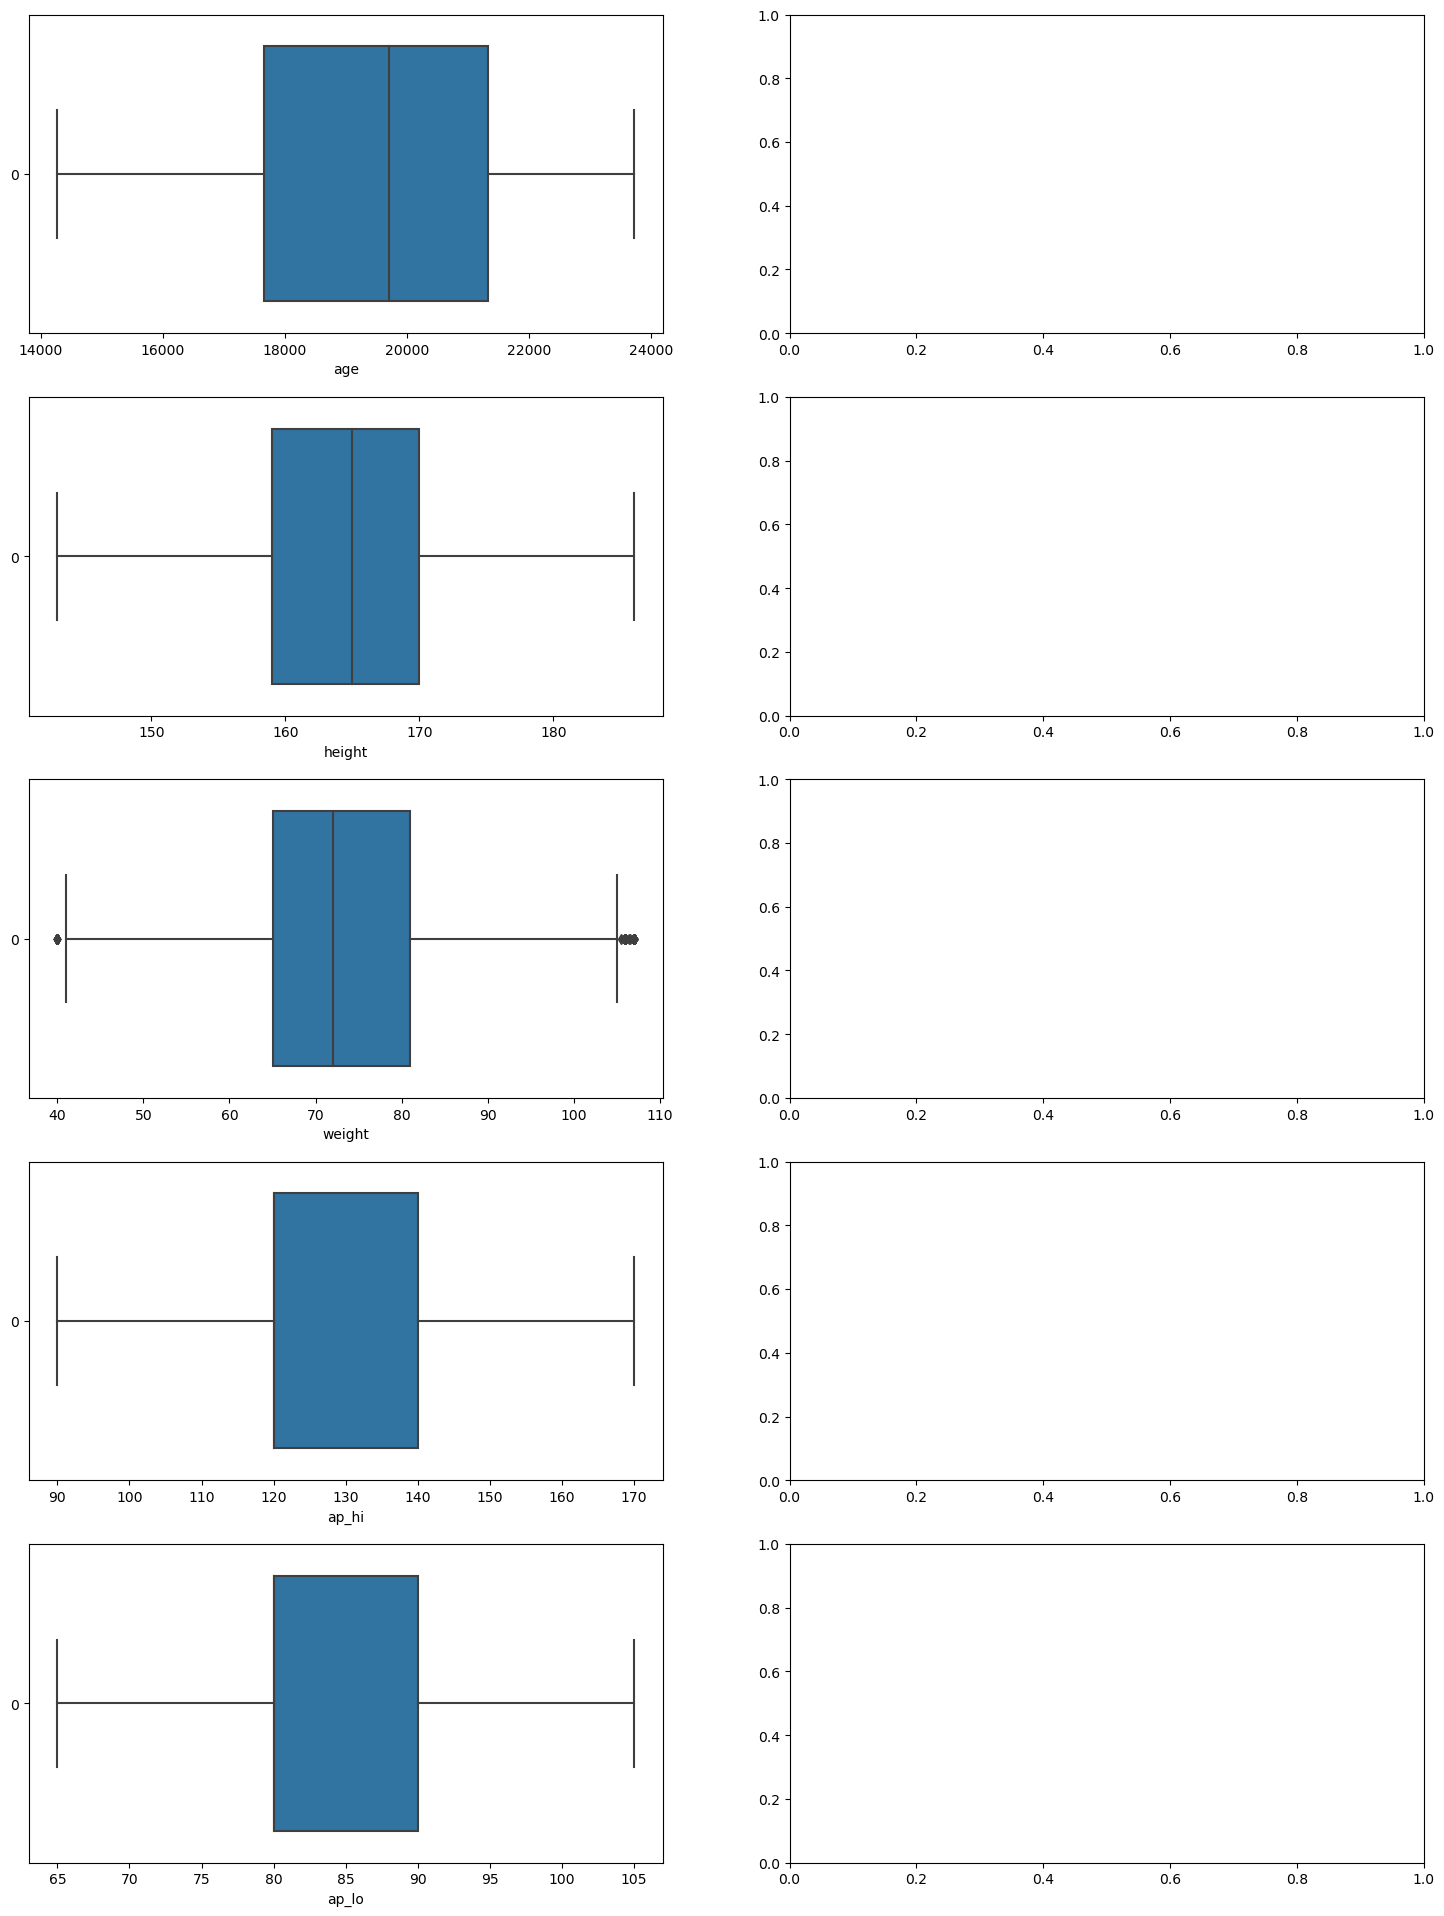

In [88]:
f, axes = plt.subplots(5, 2, figsize=(18, 24))

sb.boxplot(data = cleaned_age, orient = "h", ax = axes[0,0]).set(xlabel="age")
sb.boxplot(data = cleaned_height, orient = "h", ax = axes[1,0]).set(xlabel="height")
sb.boxplot(data = cleaned_weight, orient = "h", ax = axes[2,0]).set(xlabel="weight")
sb.boxplot(data = cleaned_ap_hi, orient = "h", ax = axes[3,0]).set(xlabel="ap_hi")
sb.boxplot(data = cleaned_ap_lo, orient = "h", ax = axes[4,0]).set(xlabel="ap_lo")

### Dropping Unecessary Variables

- The id column in unnecessary as our table already has an index value for each row of data
- As a result, we can remove 'id' from column 2 and store it in a new dataset

In [89]:
dataset_v3 = dataset_v2.drop('id', axis=1)
dataset_v3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


- We will create a contigency table by cross-tabulating each of the columns and the presence of cardiovascular disease from the dataset
- We will then perofrom a chi-squared test to calculate the phi-coefficient which is a measure of associaion between 2 categorical variables

In [90]:
cont_table1 = pd.crosstab(dataset_v2['cholesterol'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table1)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))

print(f"Phi-coefficient of cholesterol and cardio: {phi:.4f}")
cont_table1.head()

Phi-coefficient of cholesterol and cardio: 0.2211


cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


In [91]:
cont_table2 = pd.crosstab(dataset_v2['gluc'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table2)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of gluc and cardio: {phi:.4f}")
cont_table2.head()

Phi-coefficient of gluc and cardio: 0.0916


cardio,0,1
gluc,,
1,30894,28585
2,2112,3078
3,2015,3316


In [92]:
cont_table3 = pd.crosstab(dataset_v2['smoke'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table3)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of smoke and cardio: {phi:.4f}")
cont_table3.head()

Phi-coefficient of smoke and cardio: 0.0154


cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


In [93]:
cont_table4 = pd.crosstab(dataset_v2['alco'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table4)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of alco and cardio: {phi:.4f}")
cont_table4.head()

Phi-coefficient of alco and cardio: 0.0073


cardio,0,1
alco,,
0,33080,33156
1,1941,1823


In [94]:
cont_table5 = pd.crosstab(dataset_v2['active'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table5)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of active and cardio: {phi:.4f}")
cont_table5.head()

Phi-coefficient of active and cardio: 0.0356


cardio,0,1
active,,
0,6378,7361
1,28643,27618


In [95]:
cont_table6 = pd.crosstab(dataset_v2['gender'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table6)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of active and cardio: {phi:.4f}")
cont_table6.head()

Phi-coefficient of active and cardio: 0.0081


cardio,0,1
gender,,
1,22914,22616
2,12107,12363


## Converting data

- We will convert the columns in the dataset 
    1) Height to Centimeters to Meters
    2) Age from Days to Years

In [96]:
dataset_v3['height'] = round(dataset_v3['height'] / 100, 2)
dataset_v3['age'] = round(dataset_v3['age'] / 365)


In [97]:
dataset_v3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0


- This means that the column "cardio" has a total of 62,502 values, where each value represents whether an individual has cardiovascular disease (present) or not (not present).

- The count indicates the total number of non-null values in the column. In this case, all 62,502 values are non-null.

- The unique indicates the number of unique values in the column, which in this case is 2. This means that there are only two possible values that can appear in the column, namely present and not present.

- The top indicates the most frequently occurring value in the column, which in this case is not present. This means that the majority of individuals in the dataset do not have cardiovascular disease.

- Finally, the freq indicates the frequency of the most frequently occurring value, which in this case is 31,632. This means that out of the total 62,502 values in the column, 31,632 of them are not present, while the remaining 30,870 are present.

In [98]:
outliers = outliers1 | outliers2 | outliers3 | outliers4 | outliers5

In [99]:
dataset_v4 = dataset_v3[~outliers]

In [100]:
dataset_v4.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,53.407155,1.348581,1.644061,73.181456,126.420339,81.699146,1.357717,1.220649,0.086349,0.052174,0.804310,0.493904
std,6.740124,0.476525,0.075314,12.271998,14.289980,7.673399,0.675203,0.567601,0.280881,0.222380,0.396734,0.499967
min,39.000000,1.000000,1.430000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,1.860000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
dataset_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62502 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          62502 non-null  float64
 1   gender       62502 non-null  int64  
 2   height       62502 non-null  float64
 3   weight       62502 non-null  float64
 4   ap_hi        62502 non-null  int64  
 5   ap_lo        62502 non-null  int64  
 6   cholesterol  62502 non-null  int64  
 7   gluc         62502 non-null  int64  
 8   smoke        62502 non-null  int64  
 9   alco         62502 non-null  int64  
 10  active       62502 non-null  int64  
 11  cardio       62502 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.2 MB


- Transferring data from the column 'ap_hi' to test1 and similarly transferring data from column 'ap_lo' to test2
- Transferring data from the column 'height' to test3 and similarly transferring data from column 'weight' to test4

In [102]:
test1 = dataset_v4['ap_hi'].tolist()
test2 = dataset_v4['ap_lo'].tolist()
test3 = dataset_v4['height'].tolist()
test4 = dataset_v4['weight'].tolist()

- Running an if loop to ensure that the data that falls into the catergory is classified correctly.

- In this case ap_hi being more than 140 and ap_lo being more than 90 for high blood pressure are assigned with the value 1

- Other data for ap_hi and ap_lo will be normal blood values assigned with the value 0

In [103]:
test = []
for i in range(len(test1)):
    if (test1[i]>=140 and test2[i]>=90):
        test.append(1)
    else:
        test.append(0)

- Converting height and weight to BMI using the formula below:
    - $ BMI = weight / (height) ^ 2 $


In [104]:
bmi_lst = []
for i in range(len(test3)):
    bmi = test4[i]/test3[i]/test3[i]
    bmi_lst.append(bmi)

- Creating a new dataset adding blood pressure and BMI columns derived earlier

In [105]:
dataset_v5 = dataset_v4.copy()
dataset_v5.loc[:, 'Blood pressure'] = test
dataset_v5.loc[:, 'BMI'] = bmi_lst


In [106]:
dataset_v5.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Blood pressure,BMI
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,0,21.967120
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,1,34.927679
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,0,23.507805
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,1,28.710479
5,60.0,1,1.51,67.0,120,80,2,2,0,0,0,0,0,29.384676


- Removing 'ap_hi' and 'ap_lo' as we have already established their use to identify high blood pressure.

In [107]:
dataset_v5 = dataset_v5.drop('ap_hi', axis=1)
dataset_v5 = dataset_v5.drop('ap_lo', axis=1)

In [108]:
dataset_v5.head(1000)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,Blood pressure,BMI
0,50.0,2,1.68,62.0,1,1,0,0,1,0,0,21.967120
1,55.0,1,1.56,85.0,3,1,0,0,1,1,1,34.927679
2,52.0,1,1.65,64.0,3,1,0,0,0,1,0,23.507805
3,48.0,2,1.69,82.0,1,1,0,0,1,1,1,28.710479
5,60.0,1,1.51,67.0,2,2,0,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...
1118,44.0,1,1.70,65.0,1,1,0,0,1,0,0,22.491349
1119,49.0,2,1.66,76.0,1,1,0,0,1,0,0,27.580200
1120,62.0,1,1.54,92.0,3,1,0,0,0,1,1,38.792376
1121,52.0,2,1.70,70.0,1,1,0,0,1,0,0,24.221453


In [109]:
cont_table7 = pd.crosstab(dataset_v5['Blood pressure'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table7)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of Blood pressure and cardio: {phi:.4f}")
cont_table7.head()

Phi-coefficient of Blood pressure and cardio: 0.3251


cardio,0,1
Blood pressure,,
0,29667,20497
1,1965,10373


## B. Exploratory Analysis (Same as before)

- Let us revisit the-Phi coefficients calculated before

In [148]:
cont_table1 = pd.crosstab(dataset_v2['cholesterol'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table1)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))

print(f"Phi-coefficient of cholesterol and cardio: {phi:.4f}")
cont_table1.head()

Phi-coefficient of cholesterol and cardio: 0.2211


cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


In [111]:
cont_table2 = pd.crosstab(dataset_v2['gluc'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table2)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of gluc and cardio: {phi:.4f}")
cont_table2.head()

Phi-coefficient of gluc and cardio: 0.0916


cardio,0,1
gluc,,
1,30894,28585
2,2112,3078
3,2015,3316


In [112]:
cont_table3 = pd.crosstab(dataset_v2['smoke'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table3)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of smoke and cardio: {phi:.4f}")
cont_table3.head()

Phi-coefficient of smoke and cardio: 0.0154


cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


In [113]:
cont_table4 = pd.crosstab(dataset_v2['alco'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table4)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of alco and cardio: {phi:.4f}")
cont_table4.head()

Phi-coefficient of alco and cardio: 0.0073


cardio,0,1
alco,,
0,33080,33156
1,1941,1823


In [114]:
cont_table5 = pd.crosstab(dataset_v2['active'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table5)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of active and cardio: {phi:.4f}")
cont_table5.head()

Phi-coefficient of active and cardio: 0.0356


cardio,0,1
active,,
0,6378,7361
1,28643,27618


In [115]:
cont_table6 = pd.crosstab(dataset_v2['gender'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table6)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of gender and cardio: {phi:.4f}")
cont_table6.head()

Phi-coefficient of gender and cardio: 0.0081


cardio,0,1
gender,,
1,22914,22616
2,12107,12363


In [116]:
cont_table7 = pd.crosstab(dataset_v5['Blood pressure'], dataset_v2['cardio'])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = chi2_contingency(cont_table7)

# Calculate the phi-coefficient
phi = np.sqrt(chi2 / len(dataset_v2))
print(f"Phi-coefficient of Blood pressure and cardio: {phi:.4f}")
cont_table7.head()

Phi-coefficient of Blood pressure and cardio: 0.3251


cardio,0,1
Blood pressure,,
0,29667,20497
1,1965,10373


- From the Phi-Correlations calculated, 'cholesterol' and 'BMI' showed a significant correlation with the prescence of CVDs
- Hence, we will include them in our final model.

### Performing Logistic Regression

- We will perform logistic regression on the target variable 'cardio' using the predictor variables listed below:
    1) age
    2) BMI
- The features and target variable are seperated and the features are scaled using StandardScalar
- The data is then split into training and testing sets with a 75%-25% ratio
- The logistic regression model is fit on the training set
- Finally, the coefficeints of the logistic regression model are printed
- The coefficients represent the change in log-odds of cardiovasculara disease for one unit increase in the corresponding predictor variables

In [129]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target
X = dataset_v5['age']
y = dataset_v5['cardio']

# Convert categorical variables to dummy variables
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X.values.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Print the coefficients of the logistic regression model
print(logreg.coef_)

[[0.487224]]


In [130]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target
X = dataset_v5['BMI']
y = dataset_v5['cardio']

# Convert categorical variables to dummy variables
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X.values.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Print the coefficients of the logistic regression model
print(logreg.coef_)

[[0.36250336]]


- From the Single-Variate Logistic Regression models, we can tell that both 'age' and 'BMI' show significant correlation with the presence of CVDs. Hence, we will include them in our final model.

- Based on the Phi-coefficient values, we will use the features age, BMI, cholesterol and Blood pressure in our final model considering their relatively high correlation values.

## D. Using the best four features to predict CVD

- With the best features selected, the other features will be dropped

In [133]:
dataset_v6 = dataset_v5.drop('height', axis=1)
dataset_v6 = dataset_v6.drop('weight', axis=1)
dataset_v6 = dataset_v6.drop('gluc', axis=1)
dataset_v6 = dataset_v6.drop('smoke', axis=1)
dataset_v6 = dataset_v6.drop('alco', axis=1)
dataset_v6 = dataset_v6.drop('active', axis=1)
dataset_v6 = dataset_v6.drop('gender', axis= 1)

- Printing the dataset to see the dataset with the 4 best predictors mentioned earlier

In [134]:
dataset_v6.head()

,age,cholesterol,cardio,Blood pressure,BMI
0,50.0,1,0,0,21.967120
1,55.0,3,1,1,34.927679
2,52.0,3,1,0,23.507805
3,48.0,1,1,1,28.710479
5,60.0,2,0,0,29.384676


## Using various models to predict for cardiovascular disease

- We will start with multi-variate logistic regression to predict a binary outcome
- The code first seperates the features and target, and then converts categorical variables to dummy variables
- The features are then scaled using StandardScaler and are split into training sets and test sets 
- A logistic regression model is fitted to the training data
- Predictions will be made on the testing set and the accuracy of the model is calculated
- Futhermore, a confusion matrix is computed and used to calculate the False Negative Rate of the model


In [138]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target
X = dataset_v6.drop('cardio', axis=1)
y = dataset_v6['cardio']

# Convert categorical variables to dummy variables
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

# Compute the predicted probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_logreg) * 100
print("The accuracy of the multi-variate Logistic Regression model is:", accuracy)
      
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Extract the number of true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Compute the false negative rate
fnr = fn / (fn + tn)

print("The False Negative Rate of the multi-variate Logistic Regression model is:", fnr)

The accuracy of the multi-variate Logistic Regression model is: 69.99232049148854
The False Negative Rate of the multi-variate Logistic Regression model is: 0.3314368470052757


- Next, we will use the Gaussian Naive Bayes model
- The predictors are separated from the target variable and data split into training and testing sets
- The Naive Bayes Model is then trained on training data and used to make predictions on the test set
- The accuracy of the model is calculated
- A confusion matrix is also computed to calculate the False Negative Rate of the model

In [139]:
# Separate the predictors from the target variable
X = dataset_v6[['age','cholesterol', 'Blood pressure','BMI']]
y = dataset_v6['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the predicted probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) * 100
print("The accuracy of the Gaussian Naive Bayes model is:", accuracy)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the number of true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Compute the false negative rate
fnr = fn / (fn + tn)

print("The False Negative Rate of the Gaussian Naive Bayes model is:", fnr)


The accuracy of the Gaussian Naive Bayes model is: 68.89048876089913
The False Negative Rate of the Gaussian Naive Bayes model is: 0.35634066448291996


- Finally, we will use a XGBoost classifier to predict for cardiovascular disease
- The model is trained using the XGBClassifier class with a randoms tate of 42, and binary:logistic as the objective function since the target variable only has 2 outcomes
- The auc evaluation metric is used to optimize the model, and early stopping is performed after 10 rounds to prevent overfitting
- The model is then used to predict the target variable given the test set and the accuracy and False Negative Rate is calculated using accuracy_score and confusion_matrix respectively


In [140]:
import xgboost as xgb

# Separate the predictors from the target variable
X = dataset_v6[['age', 'cholesterol', 'Blood pressure','BMI']]
y = dataset_v6['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, objective='binary:logistic', eval_metric='auc', early_stopping_rounds=10)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test set using XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy of the XGBoost model
print("The accuracy of the XGBoost model is:", accuracy_xgb * 100)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Extract the number of true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Compute the false negative rate
fnr = fn / (fn + tn)

print("The False Negative Rate of the XGBoost model is:", fnr)


The accuracy of the XGBoost model is: 69.87441004719622
The False Negative Rate of the XGBoost model is: 0.32562542258282623


- After reviewing the 3 models, our group decided that the XGBoost model was the most accurate
- The difference in accuracy of the XGBoost model from the model with the best accuracy is only 0.12%, while the XGBoost model offers a 0.5% lower False Negative Rate
- The XGBoost model will minimise the number of patients with Cardiovascular Disease that we identify wrongly, since that would give them a false sense of hope, causing them to miss out on critical treatment, thus affecting their lives.



## Using XGBoost on rows from the dataset

- Listing the first 10 rows of data from the dataframe to test on

In [143]:
#Testing XGBoost model with sample from dataframe

test = dataset_v6.reindex(columns=['age', 'cholesterol', 'Blood pressure', 'BMI', 'cardio'])
test.head(10)

,age,cholesterol,Blood pressure,BMI,cardio
0,50.0,1,0,21.967120,0
1,55.0,3,1,34.927679,1
2,52.0,3,0,23.507805,1
3,48.0,1,1,28.710479,1
5,60.0,2,0,29.384676,0
6,61.0,3,0,37.729725,0
7,62.0,3,0,29.983588,1
8,48.0,1,0,28.440955,0
10,62.0,1,0,28.010224,0
11,52.0,1,0,20.047446,0


- Defining input data to test based on the table generated above
- Running the prediction using the XGBoost model we used earlier
- Finally, a table is created to show the input parameters as well as the predicted value

In [147]:
# Define input data as a pandas DataFrame
input_data = pd.DataFrame({
    'age': [50,55,52,48,60,61,62,48,62,52],
    'cholesterol': [1,3,3,1,2,3,3,1,1,1],
    'Blood pressure': [0,1,0,1,0,0,0,0,0,0],
    'BMI':[21.967120,34.927679,23.507805,28.710479,29.384676,37.729725,29.983588,28.440955,28.010224,20.0477446]
})

# Predict binary output of cardiovascular disease for the input data
prediction = xgb_model.predict(input_data)

# Create a table to show the input parameters and predicted binary output
table_data = pd.concat([input_data, pd.DataFrame({'Prediction': prediction})], axis=1)
table_data = table_data.reset_index(drop=True)
table_data.index += 1
print(table_data)

    age  cholesterol  Blood pressure        BMI  Prediction
1    50            1               0  21.967120           0
2    55            3               1  34.927679           1
3    52            3               0  23.507805           1
4    48            1               1  28.710479           1
5    60            2               0  29.384676           1
6    61            3               0  37.729725           1
7    62            3               0  29.983588           1
8    48            1               0  28.440955           0
9    62            1               0  28.010224           1
10   52            1               0  20.047745           0
